In [27]:
# STEP 1 -  의존성 로드 ############################################################
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import seaborn as sns # seaborn ref : https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import statsmodels.api as sm;
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score , KFold
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt # plotting
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
## 정확도 지표 정의
def metrics(y_test,pred):
    print("ACC : ",accuracy_score(y_test,pred))
    print("Precision : ", precision_score(y_test,pred))
    print("recall(TP rate) : ", recall_score(y_test,pred))
    print("F1 : " , f1_score(y_test,pred))
    print("ROC SCORE : ", roc_auc_score(y_test,pred,average="macro"))


%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [22]:
## DATA LOAD TEMP NULL PUTTING
df = pd.read_csv('2016_17_18_OUTCOME.csv')
df.head()
df=df.drop(columns=['intercept','Unnamed: 0'])
df=df.fillna(0)
df.isnull().sum()

age           0
wt_itvex      0
ainc          0
DI1_pr        0
DI2_pr        0
HE_DMfh3      0
HE_ht         0
HE_wc         0
HE_BMI        0
HE_DM         0
HE_chol       0
HE_HDL_st2    0
HE_TG         0
HE_hcv        0
HE_HCT        0
HE_Uro        0
HE_NNAL       0
HE_UCREA      0
BM7           0
GS_mea_r_1    0
N_WAT_C       0
N_INTK        0
N_PROT        0
N_SFA         0
N_N3          0
N_CHOL        0
N_CHO         0
N_TDF         0
N_SUGAR       0
N_FE          0
N_B1          0
dtype: int64

In [23]:
## SETTING DEPENDENT VAR, INDEPENDENT VARS 

Y = df.HE_DM # y축 설정
X = df.drop(columns=["HE_DM"]) #결과축 삭제 for predictions

# import matplotlib.pyplot as plt
# ax=plt.subplots()

# plot_roc_curve(pipe,X_test,Y_test,alpha=0.8, lw=3,drop_intermediate=True,name="MODEL ROC CURVE")

# Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [24]:
## DEF_PIPE
pipe = Pipeline([('scaler',StandardScaler()), ('classifiers',XGBClassifier())])
# pipe.fit(X_train,Y_train)
# y_preds=pipe.predict(X_test)
# print(pipe.score(X_test,Y_test))
# metrics(Y_test,y_preds)
# plot_confusion_matrix(pipe,X_test,Y_test)

In [46]:
cv = KFold(n_splits=5)

for train,test in cv.split(X,Y):
    print(X[train])

KeyError: "None of [Int64Index([1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108,\n            ...\n            5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493], dtype='int64', length=4395)] are in the [columns]"

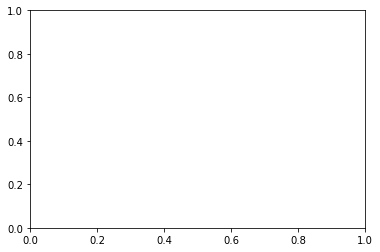

In [19]:
## SETTING
cv = StratifiedKFold(n_splits=6)
classifier = XGBClassifier
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

In [20]:
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

TypeError: fit() missing 1 required positional argument: 'y'